## Model Based On Ingredients

### Bagian Ini akan ditunda dulu bahkan kemungkinan tidak digunakan karena variasi pembeda tiap cluster sangat tidak bisa dilihat sehingga model sulit membedakan tiap clusternya

In [64]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [65]:
df_recipes = pd.read_csv('Food Ingredients and Recipe Dataset with Image Name Mapping.csv')

In [123]:
df_num_feature = pd.read_csv('epi_r.csv')

In [126]:
pd.set_option('display.max_columns', None)

In [127]:
df_num_feature.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,alcoholic,almond,amaretto,anchovy,anise,anniversary,anthony bourdain,aperitif,appetizer,apple,apple juice,apricot,arizona,artichoke,arugula,asian pear,asparagus,aspen,atlanta,australia,avocado,back to school,backyard bbq,bacon,bake,banana,barley,basil,bass,bastille day,bean,beef,beef rib,beef shank,beef tenderloin,beer,beet,bell pepper,berry,beverly hills,birthday,biscuit,bitters,blackberry,blender,blue cheese,blueberry,boil,bok choy,bon appétit,bon app��tit,boston,bourbon,braise,bran,brandy,bread,breadcrumbs,breakfast,brie,brine,brisket,broccoli,broccoli rabe,broil,brooklyn,brown rice,brownie,brunch,brussel sprout,buffalo,buffet,bulgaria,bulgur,burrito,butter,buttermilk,butternut squash,butterscotch/caramel,cabbage,cake,california,calvados,cambridge,campari,camping,canada,candy,candy thermometer,cantaloupe,capers,caraway,cardamom,carrot,cashew,casserole/gratin,cauliflower,caviar,celery,chambord,champagne,chard,chartreuse,cheddar,cheese,cherry,chestnut,chicago,chicken,chickpea,chile,chile pepper,chili,chill,chive,chocolate,christmas,christmas eve,cilantro,cinco de mayo,cinnamon,citrus,clam,clove,cobbler/crumble,cocktail,cocktail party,coconut,cod,coffee,coffee grinder,cognac/armagnac,collard greens,colorado,columbus,condiment,condiment/spread,connecticut,cook like a diner,cookbook critic,cookie,cookies,coriander,corn,cornmeal,costa mesa,cottage cheese,couscous,crab,cranberry,cranberry sauce,cream cheese,créme de cacao,crêpe,cr��me de cacao,cuba,cucumber,cumin,cupcake,currant,curry,custard,dairy,dairy free,dallas,date,deep-fry,denver,dessert,digestif,dill,dinner,dip,diwali,dominican republic,dorie greenspan,double boiler,dried fruit,drink,drinks,duck,easter,eau de vie,edible gift,egg,egg nog,eggplant,egypt,emeril lagasse,endive,engagement party,england,entertaining,epi + ushg,epi loves the microwave,escarole,fall,family reunion,fat free,father's day,fennel,feta,fig,fish,flaming hot summer,flat bread,florida,fontina,food processor,fortified wine,fourth of july,france,frangelico,frankenrecipe,freeze/chill,freezer food,friendsgiving,frittata,fritter,frozen dessert,fruit,fruit juice,fry,game,garlic,georgia,germany,gin,ginger,goat cheese,goose,gouda,gourmet,graduation,grains,grand marnier,granola,grape,grapefruit,grappa,green bean,green onion/scallion,grill,grill/barbecue,ground beef,ground lamb,guam,guava,haiti,halibut,halloween,ham,hamburger,hanukkah,harpercollins,hawaii,hazelnut,healdsburg,healthy,herb,high fiber,hollywood,hominy/cornmeal/masa,honey,honeydew,hors d'oeuvre,horseradish,hot drink,hot pepper,house & garden,house cocktail,houston,hummus,ice cream,ice cream machine,iced coffee,iced tea,idaho,illinois,indiana,iowa,ireland,israel,italy,jalapeño,jam or jelly,jamaica,japan,jerusalem artichoke,juicer,jícama,kahlúa,kale,kansas,kansas city,kentucky,kentucky derby,kid-friendly,kidney friendly,kirsch,kitchen olympics,kiwi,kosher,kosher for passover,kumquat,kwanzaa,labor day,lamb,lamb chop,lamb shank,lancaster,las vegas,lasagna,leafy green,leek,legume,lemon,lemon juice,lemongrass,lentil,lettuce,lima bean,lime,lime juice,lingonberry,liqueur,lobster,london,long beach,los angeles,louisiana,louisville,low cal,low carb,low cholesterol,low fat,low sodium,low sugar,low/no sugar,lunar new year,lunch,lychee,macadamia nut,macaroni and cheese,maine,mandoline,mango,maple syrup,mardi gras,margarita,marinade,marinate,marsala,marscarpone,marshmallow,martini,maryland,massachusetts,mayonnaise,meat,meatball,meatloaf,melon,mexico,mezcal,miami,michigan,microwave,midori,milk/cream,minneapolis,minnesota,mint,mississippi,missouri,mixer,molasses,monterey jack,mortar and pestle,mother's day,mozzarella,muffin,mushroom,mussel,mustard,mustard greens,nancy silverton,nebraska,nectarine,new hampshire,new jersey,new mexico,new orleans,new year's day,new year's eve,new york,"no meat, no problem",no sugar a

In [66]:
df_recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13501 entries, 0 to 13500
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           13501 non-null  int64 
 1   Title                13496 non-null  object
 2   Ingredients          13501 non-null  object
 3   Instructions         13493 non-null  object
 4   Image_Name           13501 non-null  object
 5   Cleaned_Ingredients  13501 non-null  object
dtypes: int64(1), object(5)
memory usage: 633.0+ KB


In [67]:
df_recipes.isnull().sum()

Unnamed: 0             0
Title                  5
Ingredients            0
Instructions           8
Image_Name             0
Cleaned_Ingredients    0
dtype: int64

In [68]:
df_recipes.head()

,Unnamed: 0,Title,Ingredients,Instructions,Image_Name,Cleaned_Ingredients
0,0,Miso-Butter Roast Chicken With Acorn Squash Pa...,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...","Pat chicken dry with paper towels, season all ...",miso-butter-roast-chicken-acorn-squash-panzanella,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher..."
1,1,Crispy Salt and Pepper Potatoes,"['2 large egg whites', '1 pound new potatoes (...",Preheat oven to 400°F and line a rimmed baking...,crispy-salt-and-pepper-potatoes-dan-kluger,"['2 large egg whites', '1 pound new potatoes (..."
2,2,Thanksgiving Mac and Cheese,"['1 cup evaporated milk', '1 cup whole milk', ...",Place a rack in middle of oven; preheat to 400...,thanksgiving-mac-and-cheese-erick-williams,"['1 cup evaporated milk', '1 cup whole milk', ..."
3,3,Italian Sausage and Bread Stuffing,"['1 (¾- to 1-pound) round Italian loaf, cut in...",Preheat oven to 350°F with rack in middle. Gen...,italian-sausage-and-bread-stuffing-240559,"['1 (¾- to 1-pound) round Italian loaf, cut in..."
4,4,Newton's Law,"['1 teaspoon dark brown sugar', '1 teaspoon ho...",Stir together brown sugar and hot water in a c...,newtons-law-apple-bourbon-cocktail,"['1 teaspoon dark brown sugar', '1 teaspoon ho..."


In [69]:
df_recipes = df_recipes.dropna(subset=['Title']) # hapus yang gak ada title

In [70]:
df_recipes['Instructions'] = df_recipes['Instructions'].fillna('No Instruction available.')

In [71]:
df_recipes.isnull().sum()

Unnamed: 0             0
Title                  0
Ingredients            0
Instructions           0
Image_Name             0
Cleaned_Ingredients    0
dtype: int64

In [72]:
food = df_recipes.copy()

In [73]:
import re
import ast

def extract_core_ingredients(ingredients_list):
    """
    Membersihkan ingredients dalam bentuk list STRING,
    menghapus satuan, angka, tanda kurung, descriptor tidak penting,
    dan menghasilkan list ingredient core seperti 'whole chicken', 'kosher salt'.
    """

    # Jika bukan list, convert (dataset kamu list string)
    if not isinstance(ingredients_list, list):
        try:
            ingredients_list = ast.literal_eval(ingredients_list)
        except:
            return []

    cleaned_ingredients = []

    remove_word = {
        'divided', 'plus', 'more', 'about', 'total', 'pieces', 'cut', 'into',
        'torn', 'melted', 'room', 'temperature', 'storebought', 'homemade',
        'such', 'as', 'or', 'and', 'coarsely', 'lightly', 'beaten',
        'roughly', 'finely', 'small', 'large', 'medium'
    }

    # Pola menghapus angka + unit (stabil)
    units_pattern = r"""
        (\d+[\d\/\.\-]*)\s*                                   # angka (3, 1/2, 3-4)
        (lb|lbs|pound|pounds|oz|ounce|ounces|
         g|gram|grams|kg|ml|l|liter|cup|cups|
         tbsp|tablespoon|tablespoons|
         tsp|teaspoon|teaspoons|
         pinch|clove|cloves|stick|sticks|pint|quart|
         pkg|package)?
    """

    for ingredient in ingredients_list:
        ing = ingredient.lower().strip()

        # Hapus isi dalam kurung
        ing = re.sub(r'\([^)]*\)', '', ing)

        # Hapus angka + unit
        ing = re.sub(units_pattern, ' ', ing, flags=re.VERBOSE)

        # Hapus karakter selain huruf, spasi, dan hyphen
        ing = re.sub(r'[^a-z\s-]', ' ', ing)

        # Split kata
        words = ing.split()

        filtered = []
        for w in words:
            # Buang kata tidak penting
            if w not in remove_word and len(w) > 2:
                filtered.append(w)

        # Gabungkan kembali
        core = " ".join(filtered).strip()

        # Hanya tambahkan jika tidak kosong
        if core:
            cleaned_ingredients.append(core)

    return cleaned_ingredients


In [74]:
food["Final_Ingredients"] = food["Cleaned_Ingredients"].apply(extract_core_ingredients)


In [75]:
food

,Unnamed: 0,Title,Ingredients,Instructions,Image_Name,Cleaned_Ingredients,Final_Ingredients
0,0,Miso-Butter Roast Chicken With Acorn Squash Pa...,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...","Pat chicken dry with paper towels, season all ...",miso-butter-roast-chicken-acorn-squash-panzanella,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...","[whole chicken, tsp kosher salt, acorn squash,..."
1,1,Crispy Salt and Pepper Potatoes,"['2 large egg whites', '1 pound new potatoes (...",Preheat oven to 400°F and line a rimmed baking...,crispy-salt-and-pepper-potatoes-dan-kluger,"['2 large egg whites', '1 pound new potatoes (...","[arge egg whites, new potatoes, kosher salt, t..."
2,2,Thanksgiving Mac and Cheese,"['1 cup evaporated milk', '1 cup whole milk', ...",Place a rack in middle of oven; preheat to 400...,thanksgiving-mac-and-cheese-erick-williams,"['1 cup evaporated milk', '1 cup whole milk', ...","[evaporated milk, whole milk, garlic powder, o..."
3,3,Italian Sausage and Bread Stuffing,"['1 (¾- to 1-pound) round Italian loaf, cut in...",Preheat oven to 350°F with rack in middle. Gen...,italian-sausage-and-bread-stuffing-240559,"['1 (¾- to 1-pound) round Italian loaf, cut in...","[round italian loaf inch cubes, olive oil, swe..."
4,4,Newton's Law,"['1 teaspoon dark brown sugar', '1 teaspoon ho...",Stir together brown sugar and hot water in a c...,newtons-law-apple-bourbon-cocktail,"['1 teaspoon dark brown sugar', '1 teaspoon ho...","[dark brown sugar, hot water, bourbon, fresh l..."
...,...,...,...,...,...,...,...
13496,13496,Brownie Pudding Cake,"['1 cup all-purpose flour', '2/3 cup unsweeten...",Preheat the oven to 350°F. Into a bowl sift to...,brownie-pudding-cake-14408,"['1 cup all-purpose flour', '2/3 cup unsweeten...","[all-purpose flour, unsweetened cocoa powder, ..."
13497,13497,Israeli Couscous with Roasted Butternut Squash...,"['1 preserved lemon', '1 1/2 pound butternut s...",Preheat oven to 475°F.\nHalve lemons and scoop...,israeli-couscous-with-roasted-butternut-squash...,"['1 preserved lemon', '1 1/2 pound butternut s...","[preserved lemon, butternut squash peeled seed..."
13498,13498,Rice with Soy-Glazed Bonito Flakes and Sesame ...,['Leftover katsuo bushi (dried bonito flakes) ...,"If using katsuo bushi flakes from package, moi...",rice-with-soy-glazed-bonito-flakes-and-sesame-...,['Leftover katsuo bushi (dried bonito flakes) ...,[leftover katsuo bushi from making dashi katsu...
13499,13499,Spanakopita,['1 stick (1/2 cup) plus 1 tablespoon unsalted...,Melt 1 tablespoon butter in a 12-inch heavy sk...,spanakopita-107344,['1 stick (1/2 cup) plus 1 tablespoon unsalted...,"[unsalted butter, baby spinach, feta crumbled,..."


In [76]:
food["Ingredients_Text"] = food["Final_Ingredients"].apply(lambda x: " ".join(x))

In [105]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english', min_df=5)
X_tfidf = tfidf.fit_transform(food["Ingredients_Text"])

In [106]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=100, random_state=42)
X_reduced = svd.fit_transform(X_tfidf)


In [107]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=30, random_state=42)
food["cluster"] = kmeans.fit_predict(X_reduced)

In [108]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(X_tfidf)

In [109]:
def recommend(recipe_id, top_n=10):
    # --- Ambil nama resep target ---
    target_name = food.loc[recipe_id, "Title"]
    print(f"✅ Resep Target: **{target_name}** (ID: {recipe_id})\n")
    # ----------------------------------------------

    # Ambil cluster ID
    cluster_id = food.loc[recipe_id, "cluster"]
    
    # Filter kandidat dalam cluster yang sama
    candidates = food[food["cluster"] == cluster_id]
    
    indices = candidates.index.tolist()
    
    # Hitung similarity antara recipe_id dan semua kandidat
    sims = cosine_similarity(
        X_tfidf[recipe_id],
        X_tfidf[indices]
    )[0]
    
    candidates = candidates.copy()
    candidates["similarity"] = sims
    
    # Urutkan dari paling mirip
    candidates = candidates.sort_values("similarity", ascending=False)
    
    # Hilangkan dirinya sendiri
    candidates = candidates[candidates.index != recipe_id]
    
    return candidates.head(top_n)[["Title", "Ingredients_Text", "similarity"]]


In [110]:
# pd.set_option('display.max_colwidth', None)
pd.reset_option('display.max_colwidth')

In [111]:
food[food['Unnamed: 0'] == 300]

,Unnamed: 0,Title,Ingredients,Instructions,Image_Name,Cleaned_Ingredients,Final_Ingredients,Ingredients_Text,cluster
300,300,Stuffed Cabbage With Lemony Rice and Sumac,['12–14 large savoy or green cabbage leaves (f...,Line a baking sheet with a clean kitchen towel...,stuffed-cabbage-with-lemony-rice-and-sumac,['12–14 large savoy or green cabbage leaves (f...,"[arge savoy green cabbage leaves, kosher salt,...",arge savoy green cabbage leaves kosher salt cu...,2


In [112]:
test_id = 300
recommend(test_id, top_n=10)

✅ Resep Target: **Stuffed Cabbage With Lemony Rice and Sumac** (ID: 300)



,Title,Ingredients_Text,similarity
470,Glazed Leeks With Pine Nut Salsa Verde,arge leeks dark green parts removed kosher sal...,0.596824
338,Pork Marbella,pork tenderloins kosher salt dry white wine cu...,0.533442
157,Mississippi Corn Pudding,unsalted butter cooled slightly for greasing a...,0.523409
19,Roasted Beets With Crispy Sunchokes and Pickle...,strips zest from orange ounces fresh ginger pe...,0.507041
517,Smoky Carrot Dip,cup skin-on almonds carrots trimmed peeled cup...,0.499707
190,Summer Tomato and Ricotta Tart With Oat Pastry,rolled oats cup white chia seeds teaspoon fine...,0.498861
67,Pork Meatballs and Cucumber Salad,cup golden raisins thin-skinned cucumbers bite...,0.485600
414,Pesto Pasta Frittata,arge eggs cup whole milk cream cup grated parm...,0.481741
152,Grilled Cauliflower Wedges With Herb Tarator,cup sliced slivered almonds arlic cloves grate...,0.481480
8,Instant Pot Lamb Haleem,cup assorted dals cup white jasmine rice other...,0.481159


In [113]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X_reduced, food["cluster"])
print("Silhouette Score:", sil_score)


Silhouette Score: 0.033550179308769745


In [114]:
from sklearn.metrics import calinski_harabasz_score

ch = calinski_harabasz_score(X_reduced, food["cluster"])
print("Calinski-Harabasz Score:", ch)


Calinski-Harabasz Score: 149.46711662888512


In [115]:
from sklearn.metrics import davies_bouldin_score

db = davies_bouldin_score(X_reduced, food["cluster"])
print("Davies-Bouldin Score:", db)


Davies-Bouldin Score: 3.1947292949590227


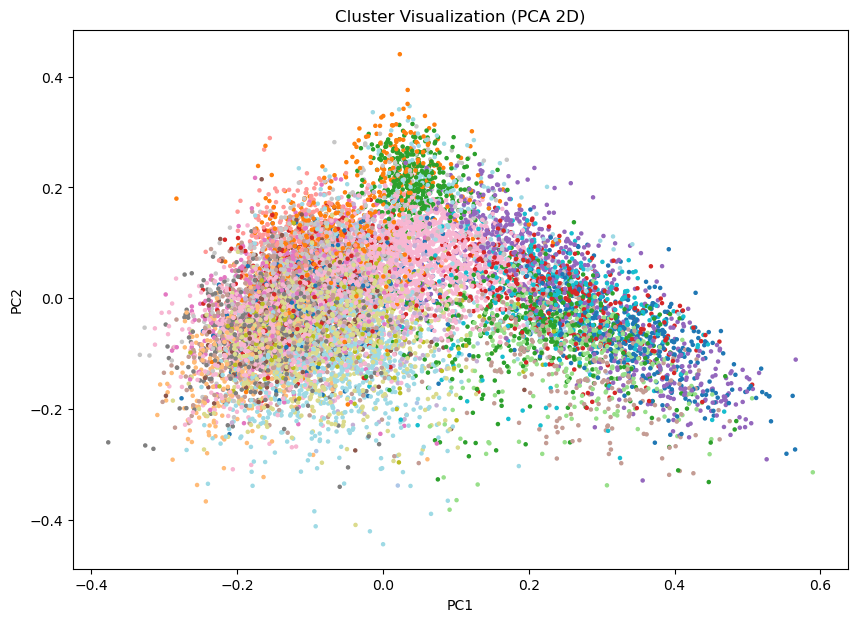

In [116]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca2 = PCA(n_components=2)
X_2d = pca2.fit_transform(X_reduced)

plt.figure(figsize=(10,7))
plt.scatter(X_2d[:,0], X_2d[:,1], c=food["cluster"], cmap="tab20", s=5)
plt.title("Cluster Visualization (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


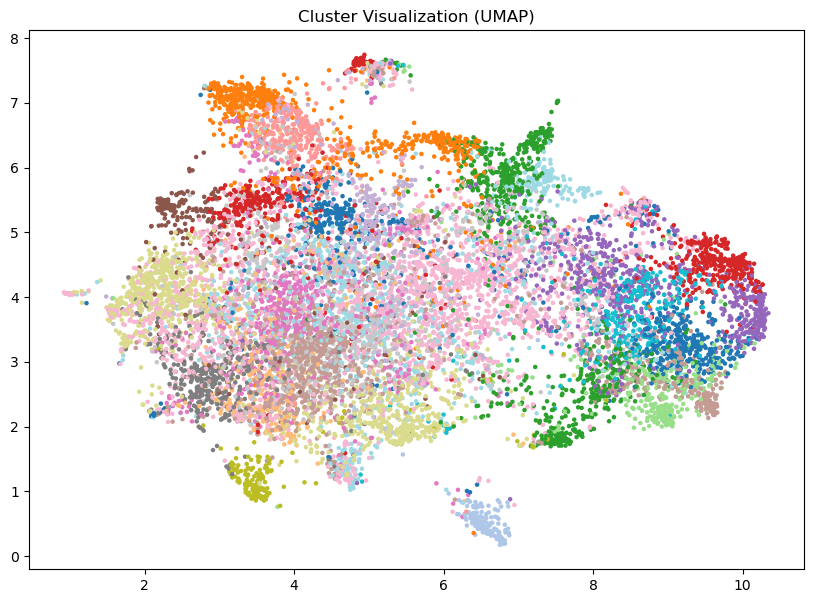

In [117]:
import umap.umap_ as umap

u = umap.UMAP(n_neighbors=30, min_dist=0.1)
X_umap = u.fit_transform(X_reduced)

plt.figure(figsize=(10,7))
plt.scatter(X_umap[:,0], X_umap[:,1], c=food["cluster"], cmap="tab20", s=5)
plt.title("Cluster Visualization (UMAP)")
plt.show()


In [122]:


# =========================================
# 1. IMPORT LIBRARY
# =========================================
import pandas as pd
import numpy as np
import ast
import re
import matplotlib.pyplot as plt

# from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score,
    pairwise_distances_argmin_min
)
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
import umap.umap_ as umap

In [ ]:

# =========================================
# 2. LOAD DATASET
# =========================================
path = "Food Ingredients and Recipe Dataset with Image Name Mapping.csv"
df = pd.read_csv(path, engine="python")

print("Shape awal:", df.shape)
print(df.head(2))

# =========================================
# 3. FUNGSI CLEANING INGREDIENTS
#    (berbasis code yang kamu kasih, sedikit dirapikan)
# =========================================

def extract_core_ingredients(ingredients_list):
    """
    Melakukan ekstraksi nama ingredients inti,
    berdasarkan list string Cleaned_Ingredients.
    """
    # Kalau datanya bukan list, coba konversi dari string ke list
    if not isinstance(ingredients_list, list):
        try:
            ingredients_list = ast.literal_eval(ingredients_list)
        except Exception:
            return []

    cleaned_ingredients = []

    # Word yang mau dibuang (descriptor yang kurang penting)
    remove_word = {
        'divided', 'plus', 'more', 'about', 'total', 'pieces', 'cut', 'into',
        'torn', 'melted', 'room', 'temperature', 'storebought', 'homemade',
        'such', 'as', 'or', 'and', 'coarsely', 'lightly', 'beaten',
        'roughly', 'finely', 'small', 'large', 'medium'
    }

    # Pola unit & angka (dari code kamu)
    units_pattern = r'\d+[½¼¾⅓⅔⅛⅜⅝⅞]?[--]?\d*\.?\d*\s*(?:lb|lbs|pound|pounds|oz|ounce|ounces|g|gram|grams|kg|ml|l|liter|cup|cups|c\.|tbsp|tablespoon|tablespoons|tsp|teaspoon|teaspoons|pinch|clove|cloves|inch|inches|in\.|qt|quart|pint|stick|sticks|pkg|package)?s?\.?'

    for ingredient in ingredients_list:
        ing = ingredient.lower().strip()

        # Hapus measurement
        ing = re.sub(units_pattern, ' ', ing)

        # Hapus isi dalam tanda kurung
        ing = re.sub(r'\([^)]*\)', ' ', ing)

        # Hapus karakter selain huruf, spasi, dan '-'
        ing = re.sub(r'[^a-z\s-]', ' ', ing)

        # Split kata
        words = ing.split()

        filtered = []
        for word in words:
            if word not in remove_word and len(word) > 2:
                filtered.append(word)

        core = ' '.join(filtered).strip()
        if len(core) > 2:
            cleaned_ingredients.append(core)

    return cleaned_ingredients

# Apply cleaning
df["Final_Ingredients"] = df["Cleaned_Ingredients"].apply(extract_core_ingredients)

# Buang resep yang tidak punya ingredient berguna
df = df[df["Final_Ingredients"].apply(len) > 0].reset_index(drop=True)
print("Setelah buang empty ingredients:", df.shape)

# Gabungkan list → 1 string per resep
df["Ingredients_Text"] = df["Final_Ingredients"].apply(lambda x: " ".join(x))

print(df[["Title", "Final_Ingredients", "Ingredients_Text"]].head(3))

# =========================================
# 4. EMBEDDING DENGAN SENTENCETRANSFORMER
# =========================================

# Model kecil, cepat, tapi cukup kuat
model = SentenceTransformer("all-MiniLM-L6-v2")

texts = df["Ingredients_Text"].tolist()
print("Jumlah resep yang di-embed:", len(texts))

embeddings = model.encode(
    texts,
    batch_size=64,
    show_progress_bar=True,
    convert_to_numpy=True,
    normalize_embeddings=True  # bagus untuk cosine similarity
)

print("Shape embeddings:", embeddings.shape)

# =========================================
# 5. CLUSTERING DENGAN KMEANS
#    (boleh kamu tuning jumlah cluster)
# =========================================

n_clusters = 30  # bisa coba 20, 30, 40, dsb
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
labels = kmeans.fit_predict(embeddings)

df["cluster"] = labels

print("Banyak cluster:", n_clusters)
print("Distribusi cluster:\n", df["cluster"].value_counts().head())

# =========================================
# 6. EVALUASI CLUSTER
# =========================================

sil = silhouette_score(embeddings, labels)
ch = calinski_harabasz_score(embeddings, labels)
db = davies_bouldin_score(embeddings, labels)

print("\n=== MODEL EVALUATION (SentenceTransformer) ===")
print("Silhouette Score      :", sil)
print("Calinski-Harabasz    :", ch)
print("Davies-Bouldin Score :", db)

# =========================================
# 7. VISUALISASI CLUSTER (UMAP 2D)
# =========================================

reducer = umap.UMAP(
    n_neighbors=30,
    min_dist=0.1,
    metric="cosine",
    random_state=42
)
emb_2d = reducer.fit_transform(embeddings)

plt.figure(figsize=(10, 7))
plt.scatter(emb_2d[:, 0], emb_2d[:, 1],
            c=labels, cmap="tab20", s=5, alpha=0.8)
plt.title("Cluster Visualization (SentenceTransformer + UMAP 2D)")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.show()

# =========================================
# 8. FUNGSI REKOMENDASI BERDASARKAN RECIPE_ID
# =========================================

def recommend_by_id(recipe_idx, top_n=10):
    """
    Mengembalikan top_n resep yang paling mirip ingredients-nya
    dengan resep di index recipe_idx.
    """
    if recipe_idx < 0 or recipe_idx >= len(df):
        raise ValueError("recipe_idx di luar range index dataframe")

    query_emb = embeddings[recipe_idx].reshape(1, -1)

    sims = cosine_similarity(query_emb, embeddings)[0]

    # Urutkan berdasarkan similarity (descending)
    indices = np.argsort(sims)[::-1]

    # Hilangkan diri sendiri
    indices = [i for i in indices if i != recipe_idx]

    top_idx = indices[:top_n]

    result = df.iloc[top_idx][["Title", "Ingredients_Text", "cluster"]].copy()
    result["similarity"] = sims[top_idx]

    print("\n=== QUERY RECIPE ===")
    print("ID   :", recipe_idx)
    print("Judul:", df.loc[recipe_idx, "Title"])
    print("Cluster:", df.loc[recipe_idx, "cluster"])
    print("Ingredients:", df.loc[recipe_idx, "Ingredients_Text"])
    print("\n=== TOP", top_n, "RECOMMENDATIONS ===")

    return result

# CONTOH TESTING
example_id = 100  # ganti dengan index yang kamu mau
recs = recommend_by_id(example_id, top_n=5)
print(recs)
